Building convential neutral network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Load the data from the keras

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

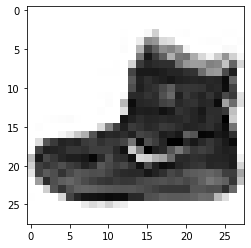

In [ ]:
plt.imshow(X_train[0],cmap= 'Greys')

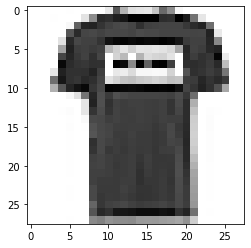

In [ ]:
plt.imshow(X_train[1],cmap= 'Greys')

In [ ]:
class_labels = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot',
                '''
                0=> T-shirt/top
                1=> Trousers
                2=>Pullover
                3=>Dress
                4=>Coat
                5=>Sandal
                6=>Shirt
                7=>Sneakers
                8=>Bag
                9=>Ankle boot
                ''']

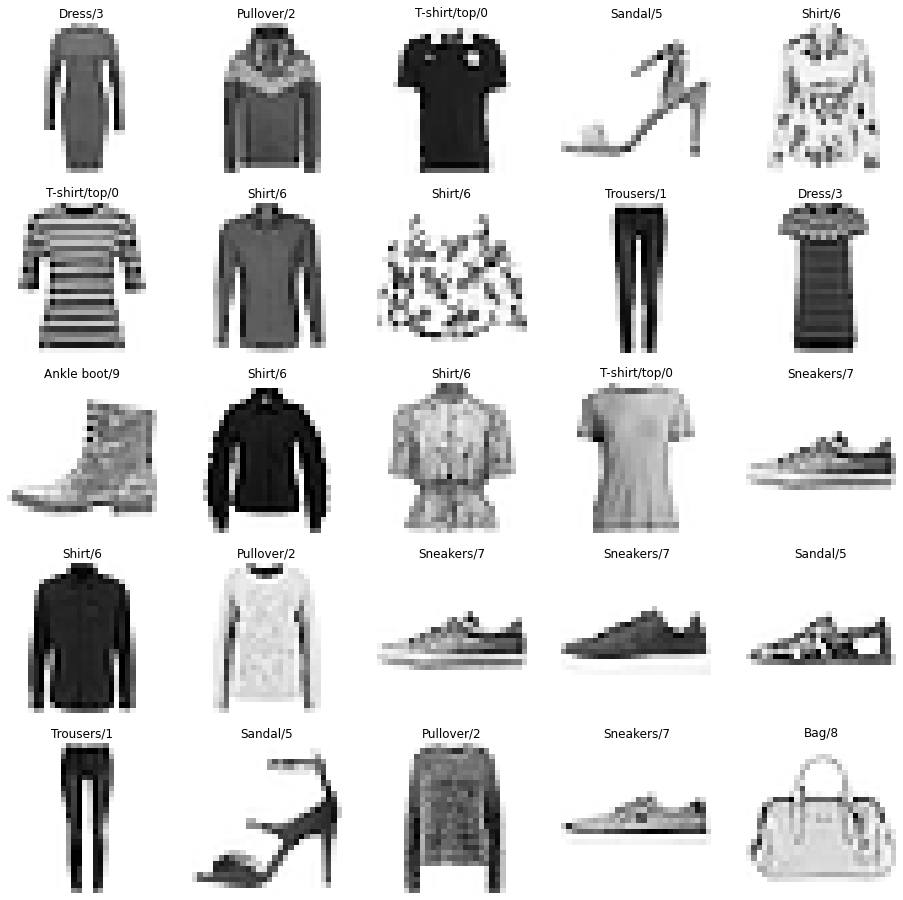

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')#off the axis
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

Change dimension

In [ ]:
X_train.ndim

3

In [ ]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

Feature Scaling

In [ ]:
X_train=X_train/255
X_test=X_test/255


In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2)

Convolutional Neural Network -Model Building

In [ ]:
 model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3, strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax'),

])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=256,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
188/188 [==============================] - 1s 6ms/step - loss: 0.5619 - accuracy: 0.8058 - val_loss: 0.3834 - val_accuracy: 0.8650
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3520 - accuracy: 0.8780 - val_loss: 0.3219 - val_accuracy: 0.8852
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3120 - accuracy: 0.8910 - val_loss: 0.3007 - val_accuracy: 0.8931
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2776 - accuracy: 0.9029 - val_loss: 0.2841 - val_accuracy: 0.8979
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2603 - accuracy: 0.9061 - val_loss: 0.2753 - val_accuracy: 0.9020
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2416 - accuracy: 0.9129 - val_loss: 0.2686 - val_accuracy: 0.9034
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2277 - accuracy: 0.9184 - val_loss: 0.2622 - val_accuracy: 0.9057
Epoch 

In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f634e06d8d0>>

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [ ]:
y_test[0]

9

In [ ]:
y_pred=model.predict(X_test).round(2)

In [ ]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.25, 0.02, 0.  ]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9012


[0.2683643102645874, 0.901199996471405]

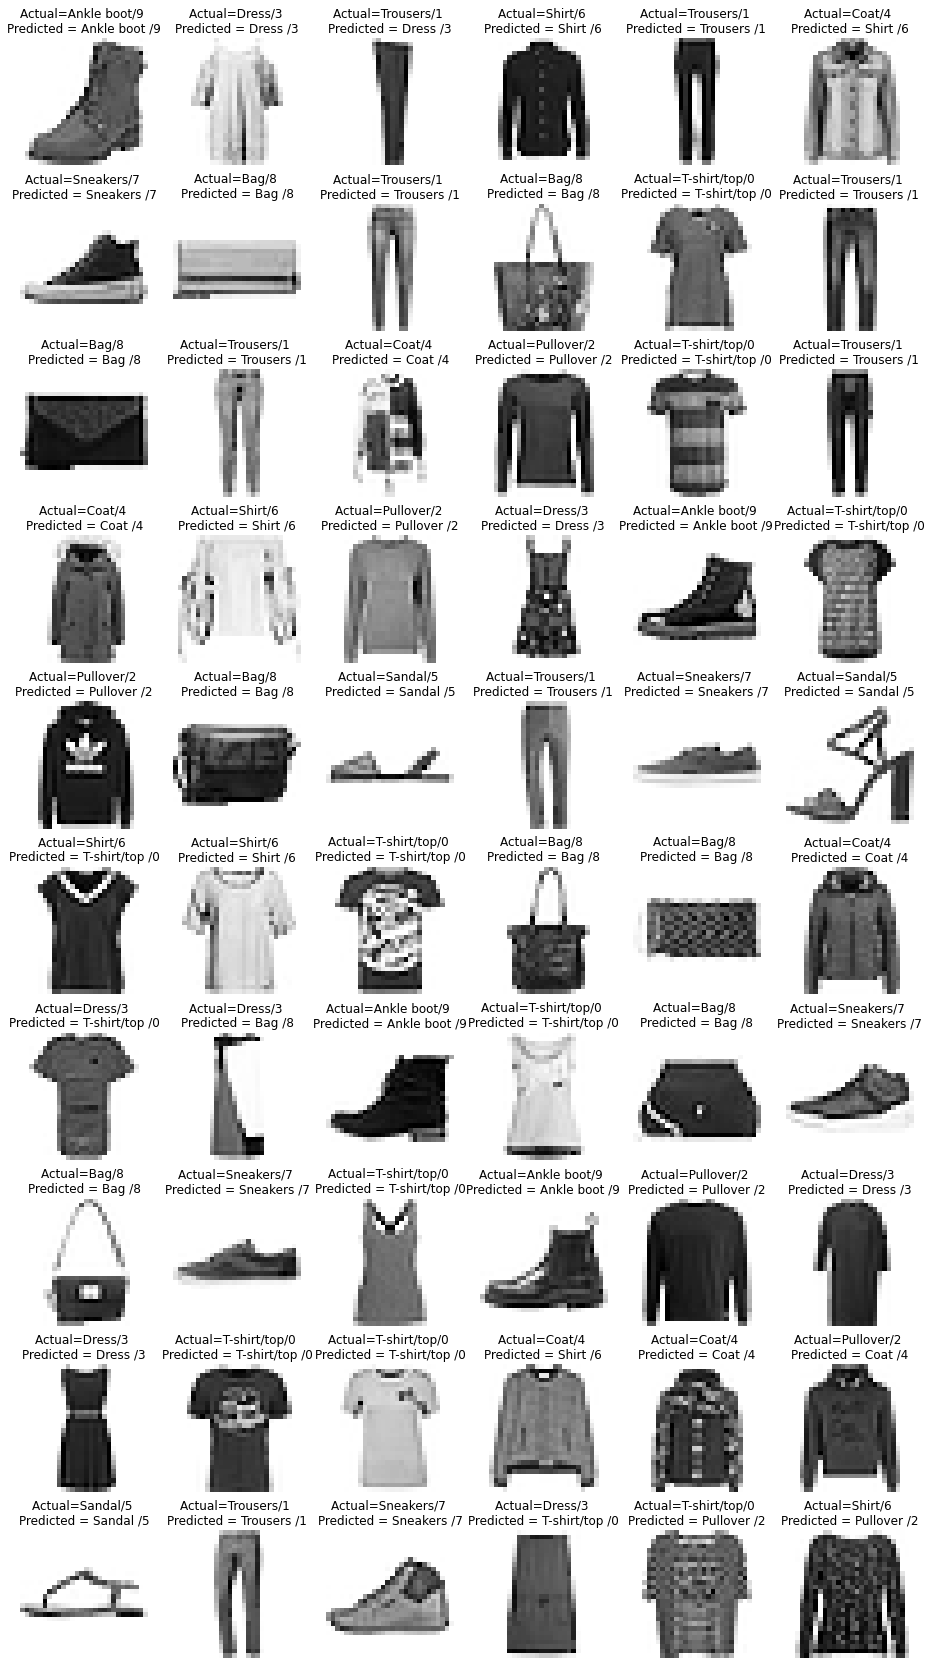

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
  plt.axis('off')#off the axis
  plt.title('Actual={}/{} \nPredicted = {} /{}'.format(class_lables[y_test[i]],y_test[i],class_lables[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

ValueError: ignored

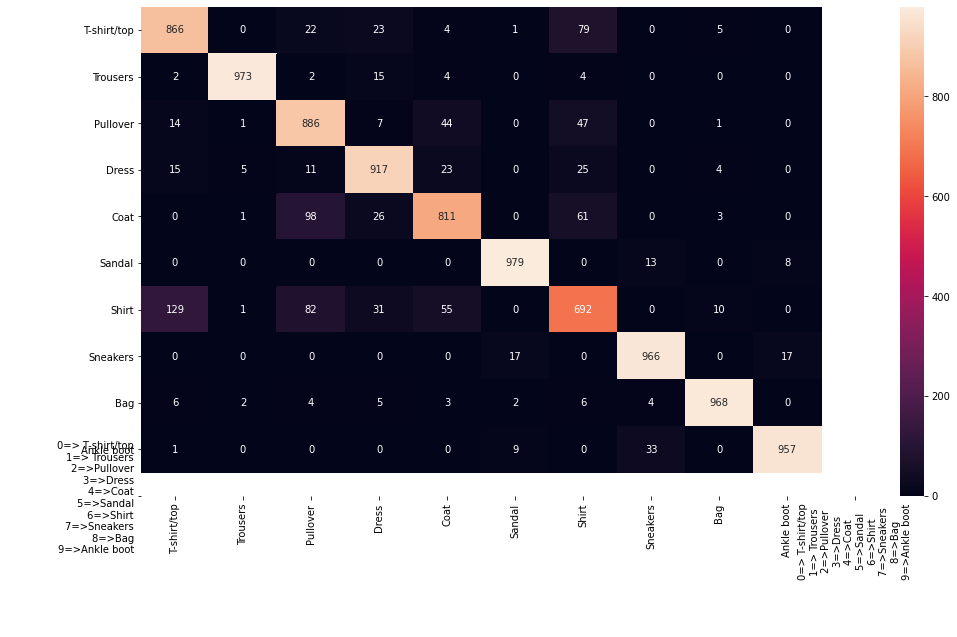

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)